<a href="https://colab.research.google.com/github/OLSecret/Wine/blob/main/Feature_selection_load_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

%matplotlib inline

In [ ]:
plt.rcParams["figure.figsize"] = (10, 8)

In [ ]:
import pprint

wine_data = load_wine()
pprint.pprint(wine_data)

print(len(wine_data.feature_names))
print(wine_data.data.shape)

{'DESCR': '.. _wine_dataset:\n'
          '\n'
          'Wine recognition dataset\n'
          '------------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 178\n'
          '    :Number of Attributes: 13 numeric, predictive attributes and '
          'the class\n'
          '    :Attribute Information:\n'
          ' \t\t- Alcohol\n'
          ' \t\t- Malic acid\n'
          ' \t\t- Ash\n'
          '\t\t- Alcalinity of ash  \n'
          ' \t\t- Magnesium\n'
          '\t\t- Total phenols\n'
          ' \t\t- Flavanoids\n'
          ' \t\t- Nonflavanoid phenols\n'
          ' \t\t- Proanthocyanins\n'
          '\t\t- Color intensity\n'
          ' \t\t- Hue\n'
          ' \t\t- OD280/OD315 of diluted wines\n'
          ' \t\t- Proline\n'
          '\n'
          '    - class:\n'
          '            - class_0\n'
          '            - class_1\n'
          '            - class_2\n'
          '\t\t\n'
  

In [ ]:


df = pd.DataFrame(
    data = wine_data.data,
    columns = wine_data.feature_names
)

df['target'] = wine_data.target

df.head(7)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


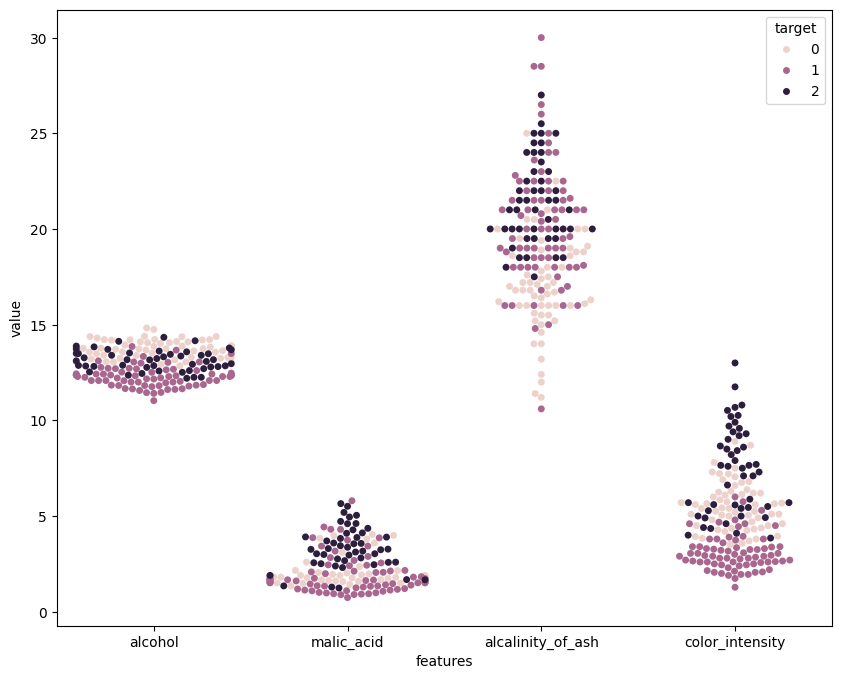

In [ ]:
from seaborn import swarmplot

data_to_plot = pd.melt(df[['alcohol', 'malic_acid', 'alcalinity_of_ash', 'color_intensity', 'target']],
                       id_vars = 'target',
                       var_name = 'features',
                       value_name = 'value'
                       )

swarmplot(data = data_to_plot, x = 'features', y = 'value', hue = 'target');

Note:
each of theese not enough to distinguish perfectly between categories, since for certain values of alcohol\malic_acid\... there are all three types of tagret 0,1,2

In [ ]:
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

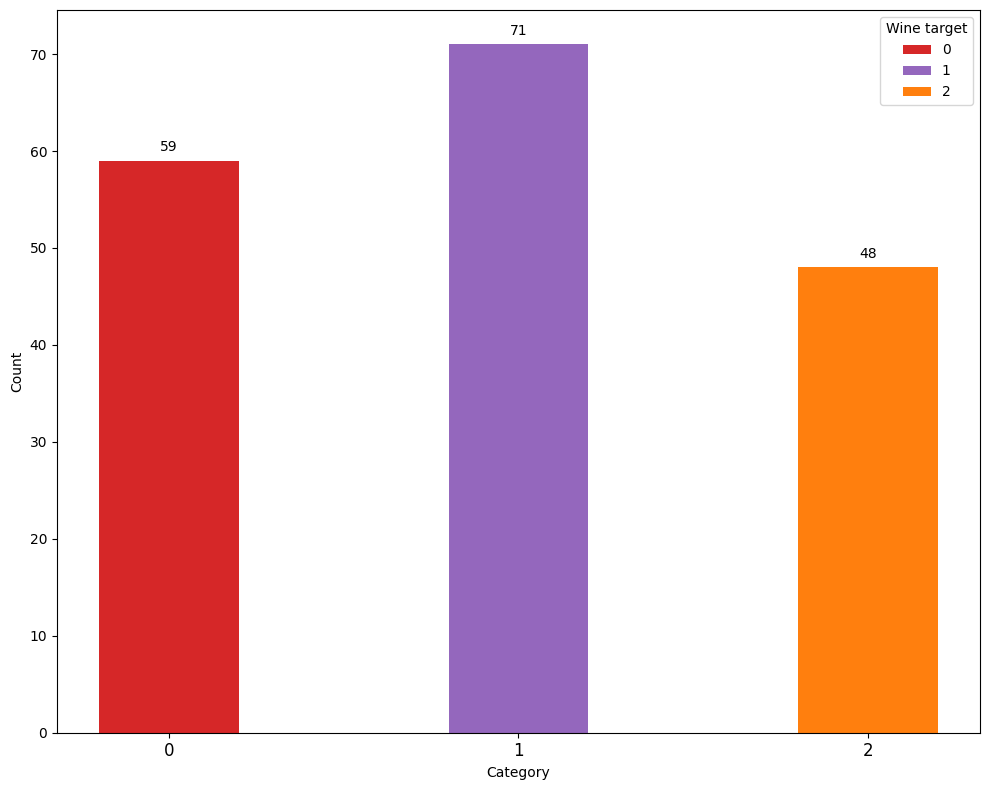

In [ ]:
fig, ax = plt.subplots()

x = [0, 1, 2]
y = [59, 71, 48]
bar_labels = ['0', '1', '2']
bar_colors = ['tab:red', 'tab:purple', 'tab:orange']
ax.bar(x, y, width = 0.4, label=bar_labels, color=bar_colors)

ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels([0, 1, 2], fontsize = 12)
ax.legend(title='Wine target')

for idx, value in enumerate(y):
  plt.text(x = int(idx), y = value + 1, s = str(value), ha = 'center')

plt.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis = 1) # everything exept target is a feature
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    shuffle = True,
                                                    stratify = y,
                                                    random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


# Baseline model: Gradient Boosting Classifier with all features

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Initialize and train classifier
gbc = GradientBoostingClassifier(max_depth = 5, random_state = 42)
gbc.fit(X_train, y_train)
# Make predictions
predictions = gbc.predict(X_test)
# Evaluate the model with F1-score
f1_score_all = round(f1_score(y_test, predictions, average = 'weighted'), 3)

print(f1_score_all)

0.908


# Feature selection techniques
1 Variance threshold

In [ ]:
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

#Calculate the variance of each feature

X_train_v1.var(axis = 0)

alcohol                             0.658341
malic_acid                          1.123507
ash                                 0.072433
alcalinity_of_ash                  11.471279
magnesium                         232.071532
total_phenols                       0.393226
flavanoids                          0.912299
nonflavanoid_phenols                0.013873
proanthocyanins                     0.335108
color_intensity                     5.669722
hue                                 0.052891
od280/od315_of_diluted_wines        0.470021
proline                         94906.710923
dtype: float64

In [ ]:
# Variance close to zero are not really predictive
# Although to compare variance we need to scale features!

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train_v1 = scaler.fit_transform(X_train_v1)

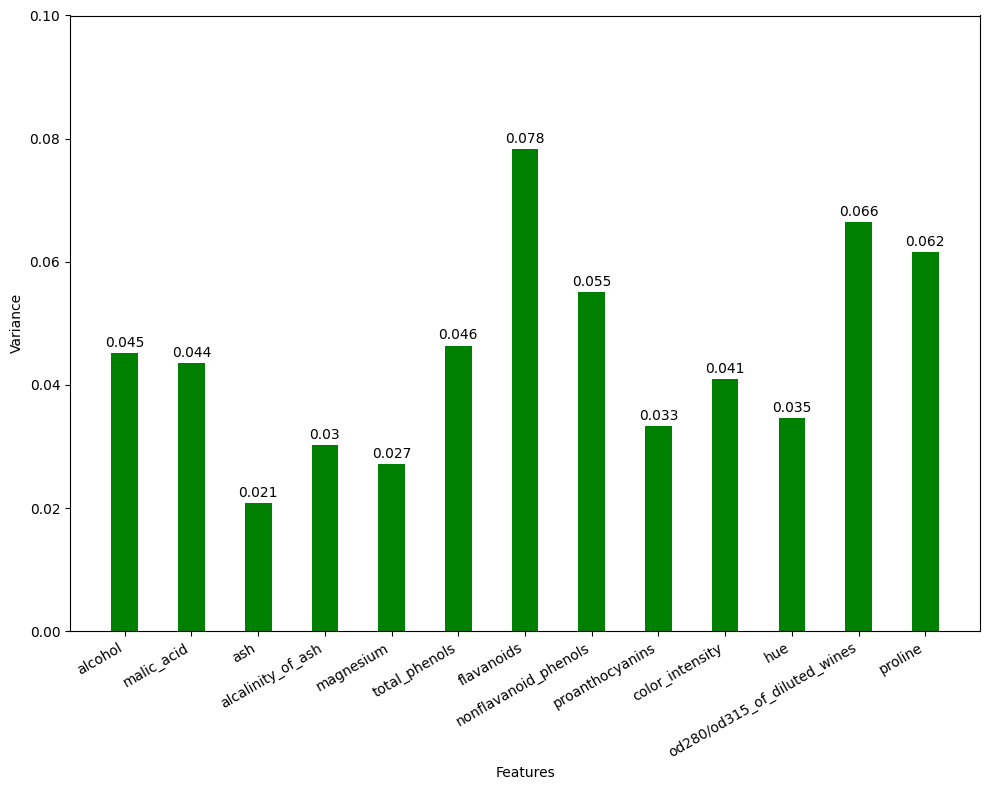

In [ ]:
fig, ax = plt.subplots()

x = X.columns
y = scaled_X_train_v1.var(axis = 0)

#bar_labels = ['0', '1', '2']
#bar_colors = ['tab:red', 'tab:purple', 'tab:orange']
ax.bar(x, y, width = 0.4, color='green') #, label=bar_labels, color=bar_colors)

ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.1)

for idx, value in enumerate(y):
  plt.text(x = idx, y = value + 0.001, s = str(round(value, 3)), ha = 'center')
fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
# try to set threshod to 0.03 to drop ash and magnesium

selected_X_train_v1 = X_train_v1.drop(['ash', 'magnesium'], axis = 1)
selected_X_test_v1 = X_test_v1.drop(['ash', 'magnesium'], axis = 1)

gbc.fit(selected_X_train_v1, y_train_v1)
var_predictions = gbc.predict(selected_X_test_v1)
# Evaluate the model with F1-score
f1_score_var = round(f1_score(y_test_v1, var_predictions, average = 'weighted'), 3)

print(f1_score_var)

0.963


In [ ]:
results = {'all features': f1_score_all, "set variance threshold to 0.3": f1_score_var}
print(results)

{'all features': 0.908, 'set variance threshold to 0.3': 0.963}


In [ ]:
# try to set threshod to 0.031 to drop columns with the variance lower than automatically

# Calculate the variance of each feature in the scaled training data
variances = scaled_X_train_v1.var(axis=0)

# Set your variance threshold
variance_threshold = 0.031

# Create a mask for columns with variance greater than the threshold
selected_features = variances > variance_threshold

# Apply this mask to select columns from the original X_train_v1 and X_test_v1
selected_X_train_v2 = X_train_v1.iloc[:, selected_features]
selected_X_test_v2 = X_test_v1.iloc[:, selected_features]

gbc.fit(selected_X_train_v2, y_train_v1)
var_predictions = gbc.predict(selected_X_test_v2)
# Evaluate the model with F1-score
f1_score_var2 = round(f1_score(y_test_v1, var_predictions, average = 'weighted'), 3)

print(f1_score_var2)

0.963


In [ ]:
from pprint import pprint
results["set variance threshold to 0.31"] = f1_score_var2
pprint(results)

{'all features': 0.908,
 'set variance threshold to 0.3': 0.963,
 'set variance threshold to 0.31': 0.963}


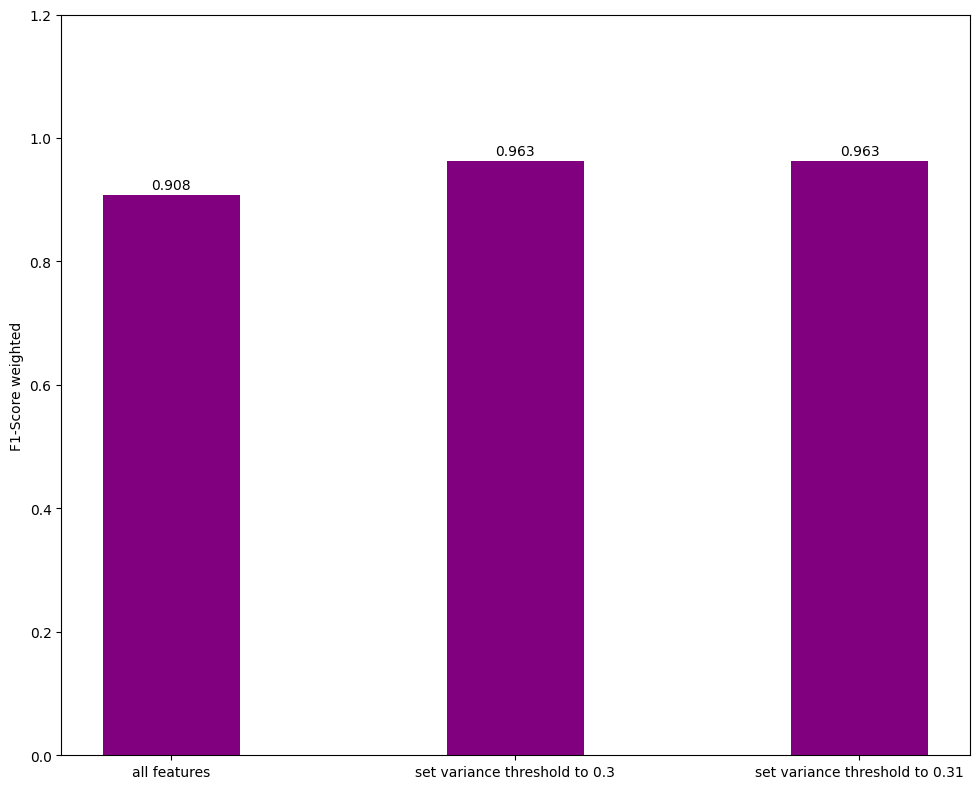

In [ ]:
fig, ax = plt.subplots()

x = results.keys()
y = results.values()

ax.bar(x, y, width = 0.4, color='purple')

#ax.set_xlabel('Features')
ax.set_ylabel('F1-Score weighted')
ax.set_ylim(0, 1.2)

for idx, value in enumerate(y):
  plt.text(x = idx, y = value + 0.01, s = str(round(value, 3)), ha = 'center')
#fig.autofmt_xdate()
plt.tight_layout()

2 Filter method
K-best features

In [ ]:
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

f1_score_list = []

for k in range(1, 14):
  selector = SelectKBest(mutual_info_classif, k = k)
  selector.fit(X_train_v3, y_train_v3)

  selected_X_train_v3 = selector.transform(X_train_v3)
  selected_X_test_v3 = selector.transform(X_test_v3)

  gbc.fit(selected_X_train_v3, y_train_v3)
  kbest_predictions = gbc.predict(selected_X_test_v3)

  f1_score_kbest = round(f1_score(y_test_v3, kbest_predictions, average = 'weighted'), 3)

  f1_score_list.append(f1_score_kbest)

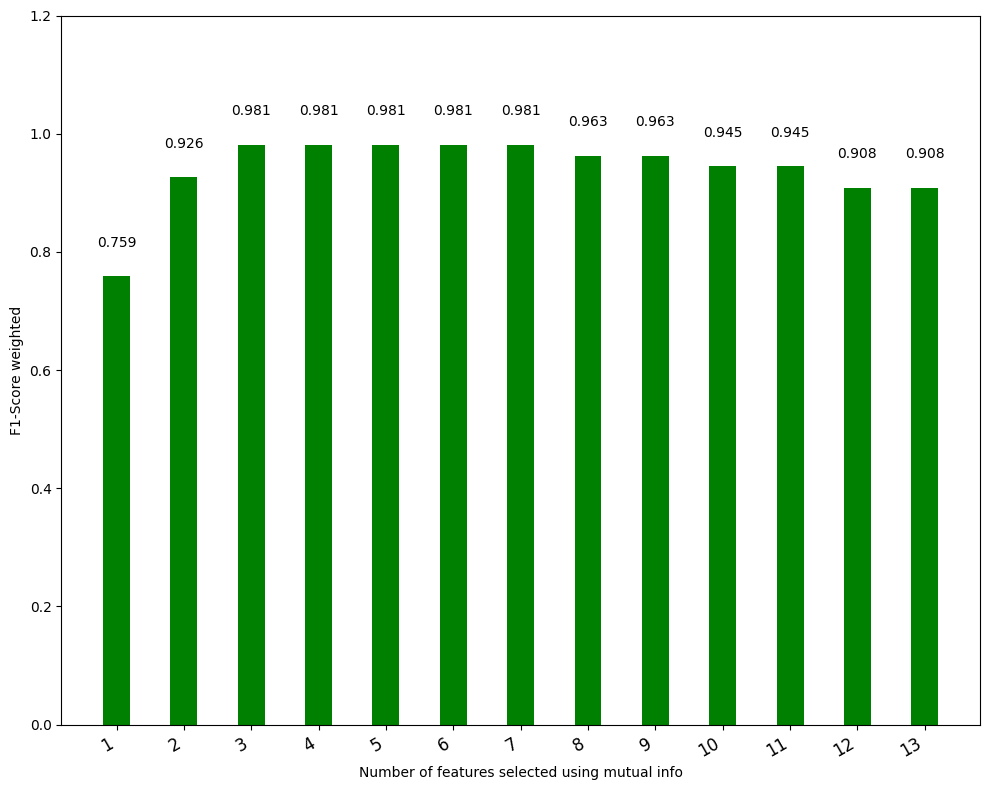

In [ ]:
fig, ax = plt.subplots()

x = np.arange(1, 14)
y = f1_score_list

ax.bar(x, y, width = 0.4, color='green')

ax.set_xlabel('Number of features selected using mutual info')
ax.set_ylabel('F1-Score weighted')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 14))
ax.set_xticklabels(np.arange(1, 14), fontsize = 12)

for idx, value in enumerate(y):
  plt.text(x = idx + 1, y = value + 0.05, s = str(value), ha = 'center')
fig.autofmt_xdate()
plt.tight_layout()

Note:
plot show that we can use the top 3 (or 4, ..., 7) features to get the best performance - 0.981

In [ ]:
selector = SelectKBest(mutual_info_classif, k = 3)
selector.fit(X_train_v3, y_train_v3)

selected_feature_mask = selector.get_support()

selected_features = X_train_v3.columns[selected_feature_mask]
selected_features


Index(['flavanoids', 'color_intensity', 'proline'], dtype='object')

{'K-best features (3 best)': 0.981,
 'all features': 0.908,
 'set variance threshold to 0.3': 0.963,
 'set variance threshold to 0.31': 0.963}


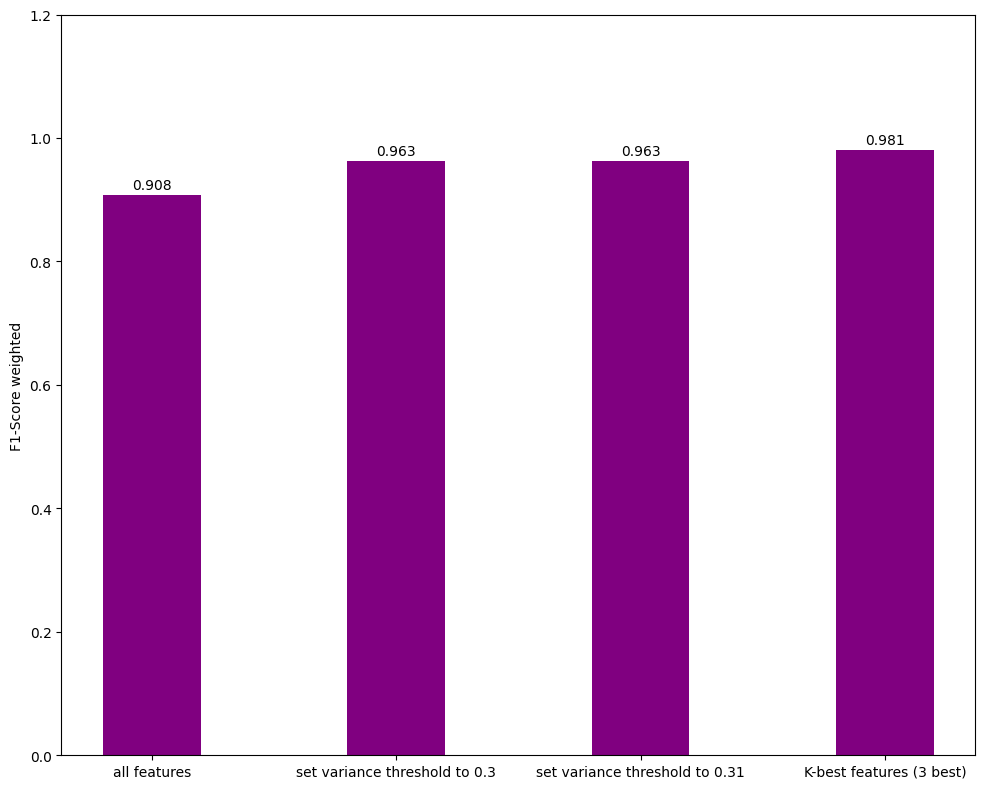

In [ ]:
from pprint import pprint
results["K-best features (3 best)"] = f1_score_list[2] # correct item from f1_score_list
pprint(results)

fig, ax = plt.subplots()

x = results.keys()
y = results.values()

ax.bar(x, y, width = 0.4, color='purple')

#ax.set_xlabel('Features')
ax.set_ylabel('F1-Score weighted')
ax.set_ylim(0, 1.2)

for idx, value in enumerate(y):
  plt.text(x = idx, y = value + 0.01, s = str(round(value, 3)), ha = 'center')
plt.tight_layout()

3 Recursive feature elimination (RFE)

In [ ]:
X_train_v4, X_test_v4, y_train_v4, y_test_v4 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
from sklearn.feature_selection import RFE
rfe_f1_score_list = []

for k in range(1, 14):
  RFE_selector = RFE(estimator=gbc, n_features_to_select = k, step = 1)
  RFE_selector.fit(X_train_v4, y_train_v4)

  selected_X_train_v4 = RFE_selector.transform(X_train_v4)
  selected_X_test_v4 = RFE_selector.transform(X_test_v4)

  gbc.fit(selected_X_train_v4, y_train_v4)
  RFE_predictions = gbc.predict(selected_X_test_v4)

  f1_score_rfe = round(f1_score(y_test_v4, RFE_predictions, average = 'weighted'), 3)

  rfe_f1_score_list.append(f1_score_rfe)

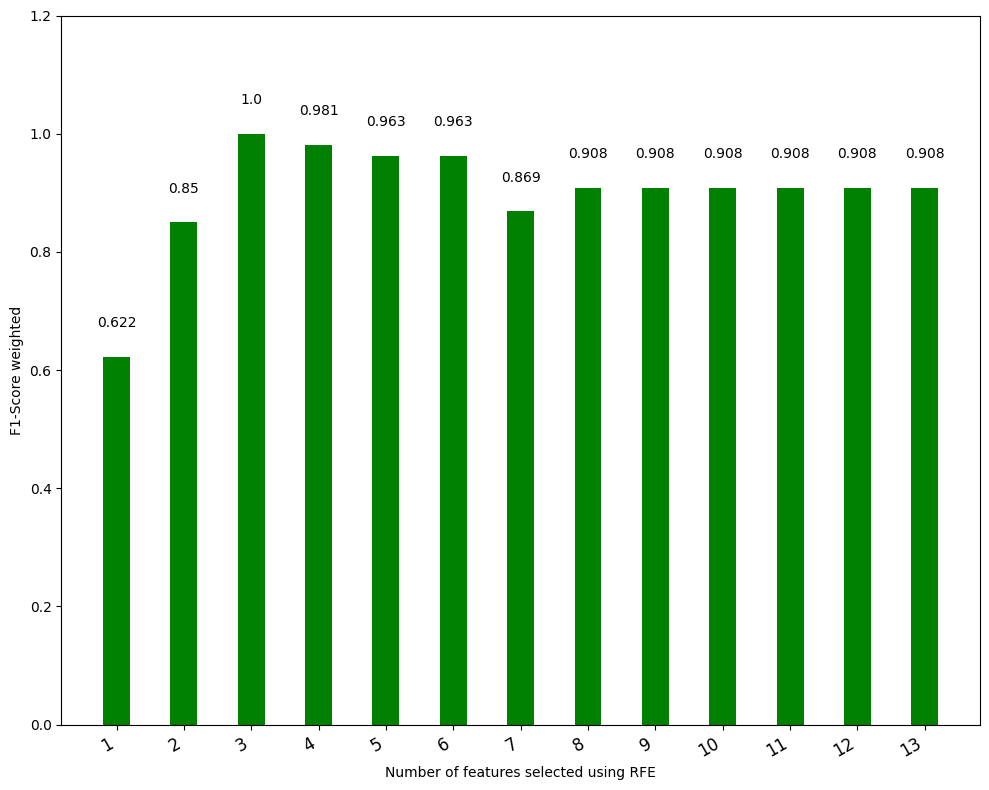

In [ ]:
fig, ax = plt.subplots()

x = np.arange(1, 14)
y = rfe_f1_score_list

ax.bar(x, y, width = 0.4, color='green')

ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('F1-Score weighted')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 14))
ax.set_xticklabels(np.arange(1, 14), fontsize = 12)

for idx, value in enumerate(y):
  plt.text(x = idx + 1, y = value + 0.05, s = str(value), ha = 'center')
fig.autofmt_xdate()
plt.tight_layout()

Top 3 features provide the perfect classifier!

In [ ]:
selector_RFE = RFE(estimator = gbc, n_features_to_select = 3, step = 10)
selector_RFE.fit(X_train_v4, y_train_v4)

selected_feature_mask = selector_RFE.get_support()

selected_features = X_train_v4.columns[selected_feature_mask]
selected_features


Index(['color_intensity', 'od280/od315_of_diluted_wines', 'proline'], dtype='object')

{'K-best features (3 best)': 0.981,
 'RFE (3 best)': 1.0,
 'all features': 0.908,
 'set variance threshold to 0.3': 0.963,
 'set variance threshold to 0.31': 0.963}


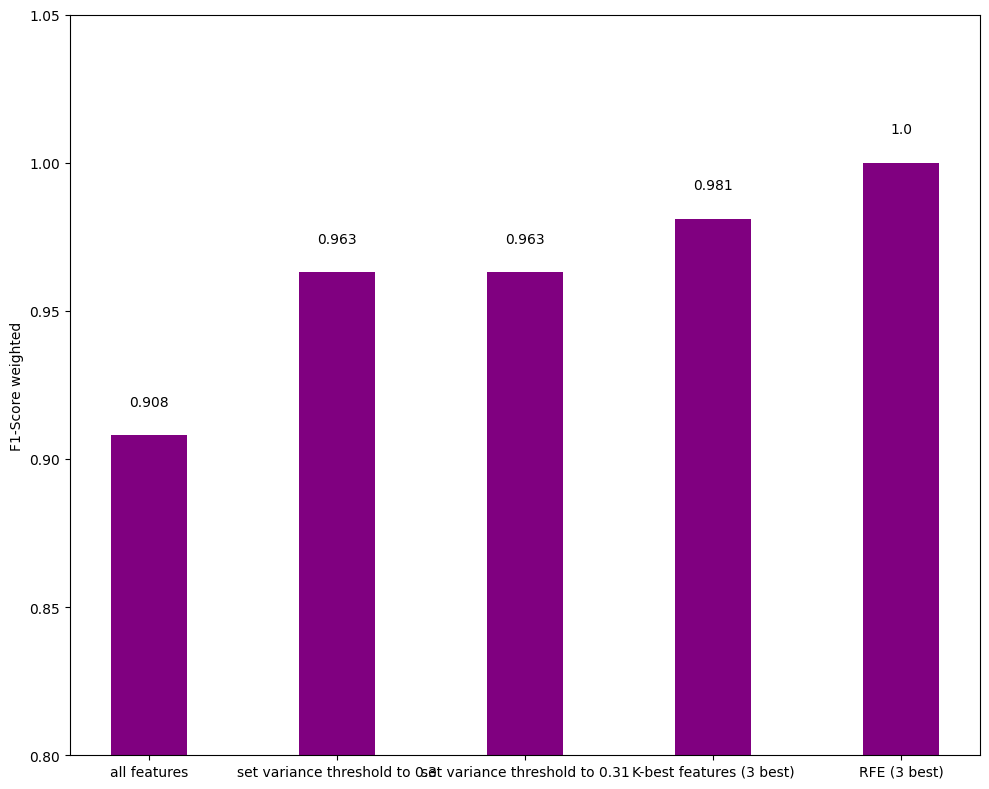

In [ ]:
results["RFE (3 best)"] = rfe_f1_score_list[2] # correct item from rfe_f1_score_list
pprint(results)

fig, ax = plt.subplots()

x = results.keys()
y = results.values()

ax.bar(x, y, width = 0.4, color='purple')

#ax.set_xlabel('Features')
ax.set_ylabel('F1-Score weighted')
ax.set_ylim(0.8, 1.05)

for idx, value in enumerate(y):
  plt.text(x = idx, y = value + 0.01, s = str(round(value, 3)), ha = 'center')
plt.tight_layout()

RFE 3 best provides the perfect prediction

4 Boruta (automated method)

In [ ]:
X_train_v5, X_test_v5, y_train_v5, y_test_v5 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
pip install boruta

In [ ]:
pip install --upgrade numpy Boruta

In [ ]:
from boruta import BorutaPy

np.int = np.int32
np.float = np.float64
np.bool = np.bool_

#boruta_selector = BorutaPy(gbc, n_estimators='auto', verbose=2, random_state = 42)
boruta_selector = BorutaPy(gbc, random_state = 42)
boruta_selector.fit(X_train_v5.values, y_train_v5.values.ravel())

selected_X_train_v5 = boruta_selector.transform(X_train_v5.values)
selected_X_test_v5 = boruta_selector.transform(X_test_v5.values) #.values

gbc.fit(selected_X_train_v5, y_train_v5)
boruta_predictions = gbc.predict(selected_X_test_v5)

f1_score_boruta = round(f1_score(y_test_v5, boruta_predictions, average = 'weighted'), 3)

In [ ]:
selected_features_mask = boruta_selector.support_

selected_features = X_train_v4.columns[selected_features_mask]
selected_features

Index(['malic_acid', 'ash', 'magnesium', 'flavanoids', 'proanthocyanins',
       'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

{'Boruta (9)': 0.982,
 'K-best features (3 best)': 0.981,
 'RFE (3 best)': 1.0,
 'all features': 0.908,
 'set variance threshold to 0.3': 0.963,
 'set variance threshold to 0.31': 0.963}


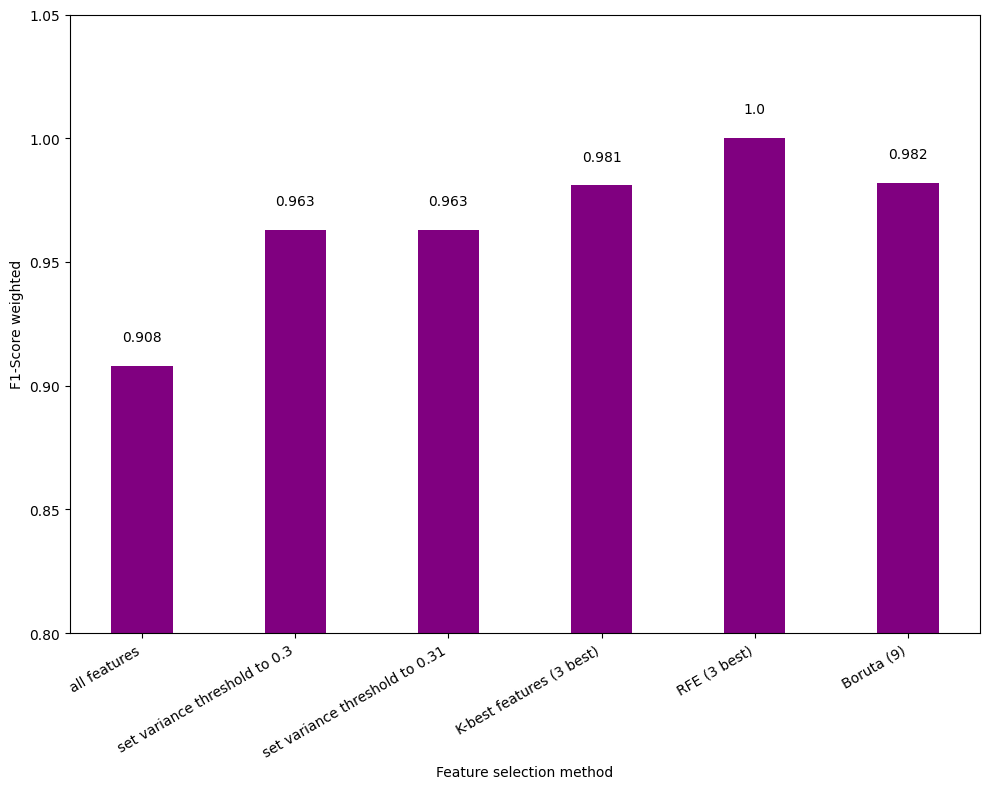

In [ ]:
results["Boruta (9)"] = f1_score_boruta
pprint(results)

fig, ax = plt.subplots()

x = results.keys()
y = results.values()

ax.bar(x, y, width = 0.4, color='purple')

ax.set_xlabel('Feature selection method')
ax.set_ylabel('F1-Score weighted')
ax.set_ylim(0.8, 1.05)

for idx, value in enumerate(y):
  plt.text(x = idx, y = value + 0.01, s = str(round(value, 3)), ha = 'center')
fig.autofmt_xdate()
plt.tight_layout()